In [1]:
!pip install nltk

In [2]:
#import relevent packages
import matplotlib.pyplot as plt
import nltk
import numpy as np
import re
import pandas as pd
import string
import seaborn as sns

from nltk.corpus import stopwords # Removes unwanted words
from nltk.stem.lancaster import LancasterStemmer # Convers words to base for; aggressive

#import packages that will help us create document-term matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

In [3]:
#For the purpose of preventing buggs...
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# STopwords is a list of words that are not really usefull in our analysis.
# So we filter them our to clean the data

set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

# Importing CSV and EValuating First 5 rows

In [5]:
data = pd.read_csv('C://Users//Brian//Documents//PythonforDataScienceTraining//toxic_comments_classifier-master//train.csv')
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
#This is to check if there are any missing values
#This is to check if we need to clean datasets
#In this case, we do not
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


# Comments for the first 3 rows

In [8]:
data['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [9]:
data['comment_text'][1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [10]:
data['comment_text'][2]

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

# Exploratory Data Analysis

Checking the percentage of comments that are toxic compared to normal comments

In [11]:
# A value of 0 = Neutral/Clean
# A valufe of 1 = Toxic
# In this Dataset, 10% of the comments would be considered toxic
data.toxic.value_counts(normalize=True)

0    0.904156
1    0.095844
Name: toxic, dtype: float64

In [12]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Created a new subset of the data by only taking the 2nd column onwards (This will include the comments and all 6 categories

In [13]:
data_count=data.iloc[:,2:].sum()
data_count

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

# Bar Chart Configurations and Sizing

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


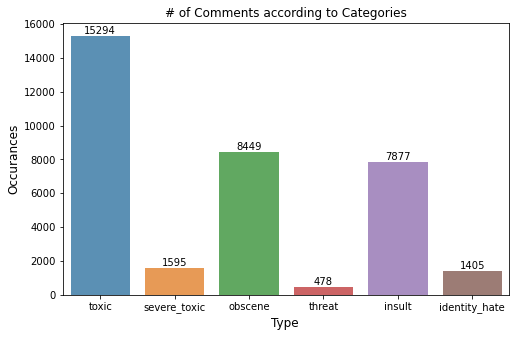

In [14]:
#Bar Chart Sizing
plt.figure(figsize = (8,5))

#Plot using index (category values) and category value
ax = sns.barplot(data_count.index, data_count.values, alpha=0.8)

plt.title("# of Comments according to Categories")
plt.ylabel('Occurances', fontsize=12)
plt.xlabel('Type ', fontsize=12)

#Text Labels
rects = ax.patches
labels = data_count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    
plt.show()

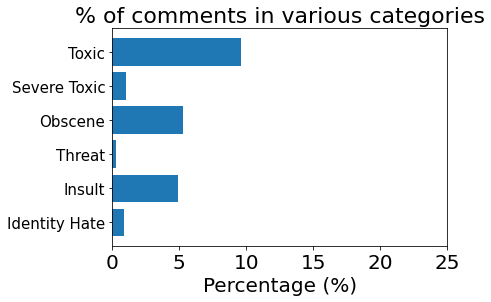

In [15]:
# Horizontal bar chart showing % of comments in various categories
num_rows = len(data)

sum_toxic = data['toxic'].sum() / num_rows *100
sum_severe_toxic = data['severe_toxic'].sum() / num_rows *100
sum_obscene = data['obscene'].sum() / num_rows *100
sum_threat = data['threat'].sum() / num_rows *100
sum_insult = data['insult'].sum() / num_rows *100
sum_identity_hate = data['identity_hate'].sum() / num_rows *100

# List 6 values to represent categories for X-AXIS
# List the 6 tiers of toxcity by % on Y-AXIS

independent = np.arange (6)
ax = plt.barh (independent, [sum_toxic, sum_severe_toxic, sum_obscene, sum_threat, sum_insult, sum_identity_hate])
plt.xlabel('Percentage (%)', size = 20)
plt.xticks(np.arange(0,30,5), size = 20)
plt.title ('% of comments in various categories', size=22)
plt.yticks(independent, ('Toxic', 'Severe Toxic', 'Obscene', 'Threat', 'Insult', 'Identity Hate'), size=15)

#Configure Graph by descending order
plt.gca().invert_yaxis()
plt.show()


# Preprocessing Text

Removing numbers, capital letters, punctation, '\n'

In [16]:
import re # re is regualar regression via libraries. Support modifier, identifiers, and white space characters
import string

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ',x)

# '[%s]' % re.escape(string.punctuation),' ' - replace punctuation with white space
# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

#Replace all '\n' in the string with a space
remove_n = lambda x: re.sub("\n", " ", x)

#Remove all non-ascii characters (chinese,Japanese,Korean, etc)
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

#Lambda functions applied with .map for columns labeled 'comments_text'
data['comment_text'] = data['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

data['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now        '

# Creating 6 Subsets; includes comment + 1 category

In [17]:
toxic_data = data.loc[:,['id','comment_text', 'toxic']]
toxic_data['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now        '

In [18]:
toxic_data['comment_text'][1]

'd aww  he matches this background colour i m seemingly stuck with  thanks    talk       january       utc '

In [19]:
toxic_severe = data.loc[:,['id','comment_text', 'severe_toxic']]

In [20]:
toxic_obscene = data.loc[:,['id','comment_text', 'obscene']]

In [21]:
toxic_threat = data.loc[:,['id', 'comment_text', 'threat']]

In [22]:
toxic_insult = data.loc[:,['id','comment_text', 'insult']]

In [23]:
data_idhate = data.loc[:,['id','comment_text','identity_hate']]

# WordCloud

Displays the words that are used most freguently foreach of the 6 categories

In [24]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [25]:
def wordcloud(df, label):
    
    #Displays rows where toxic category label = 1, meaning the comment is considered toxic
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc = WordCloud(background_color="black", max_words=4000)
    
    wc.generate(" ".join(text))
    
    plt.figure(figsize = (20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Frequent Words in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth', random_state=244), alpha=0.98)

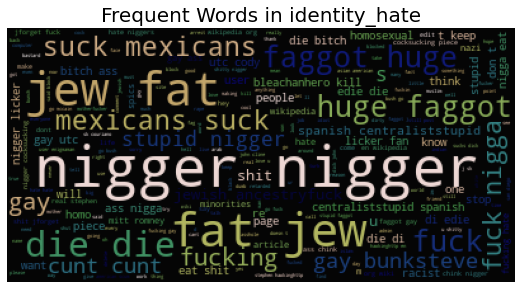

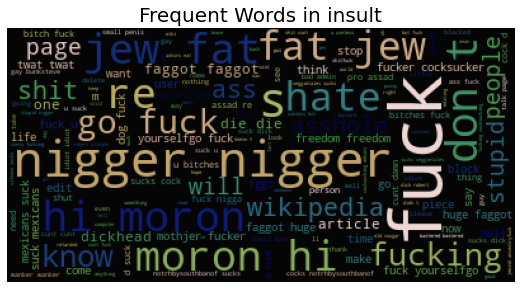

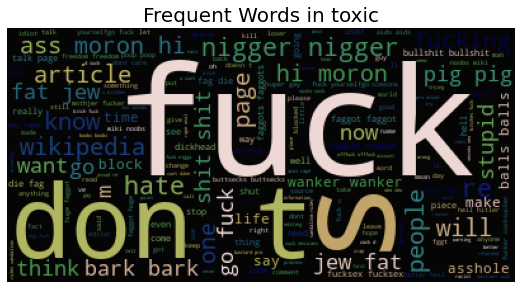

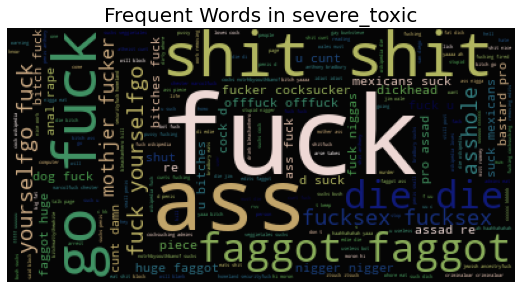

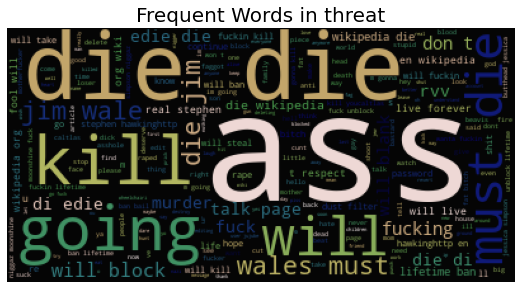

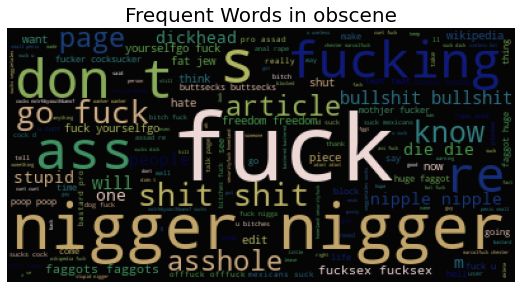

In [26]:
wordcloud(data_idhate, 'identity_hate')
wordcloud(toxic_insult, 'insult')
wordcloud(toxic_data, 'toxic')
wordcloud(toxic_severe, 'severe_toxic')
wordcloud(toxic_threat, 'threat')
wordcloud(toxic_obscene, 'obscene')

As we previous stated, comments that were considered toxic made up 10% of the comments in the dataset. This actually will cause a class imbalance issue.

In order to solve this issue, we need to take a subset of the data where toxic comments make up a larger portion in relation to comments that are considered NEUTRAL/CLEAN. In this case, 20% (Ideally 50%).

Let taking 5000 rows of toxic comments and concatenate them row-wise with non-toxic comments to achieve a more balance dataset

In [27]:
toxic_data.head()

,id,comment_text,toxic
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0


In [28]:
toxic_data_1 = toxic_data[toxic_data['toxic']==1].iloc[0:5000,:]
toxic_data_1.shape

(5000, 3)

In [29]:
toxic_data_0 = toxic_data[toxic_data['toxic']==0].iloc[0:5000,:]

In [30]:
toxic_data_done = pd.concat([toxic_data_1,toxic_data_0], axis=0)
toxic_data_done.shape

(10000, 3)

# Not all categories contain 5k rows. So we check first in order to balance data

In [31]:
toxic_severe[toxic_severe['severe_toxic']==1].count()

id              1595
comment_text    1595
severe_toxic    1595
dtype: int64

A new dataset was created to concatenate 1595 toxic comments with 1595 non-toxic comments. This will balance out the dataset for the "severe_toxic" category. Do the same for the other 5 categories

In [32]:
toxic_severe_1 = toxic_severe[toxic_severe['severe_toxic']==1].iloc[0:1595,:]
toxic_severe_0 = toxic_severe[toxic_severe['severe_toxic']==0].iloc[0:1595,:]
toxic_severe_done = pd.concat([toxic_severe_1,toxic_severe_0], axis=0)
toxic_severe_done.shape

(3190, 3)

In [33]:
toxic_data[toxic_data['toxic']==1].count()

id              15294
comment_text    15294
toxic           15294
dtype: int64

In [34]:
toxic_data_1 = toxic_data[toxic_data['toxic']==1].iloc[0:15294,:]
toxic_data_0 = toxic_data[toxic_data['toxic']==0].iloc[0:15295,:]
toxic_data_done = pd.concat([toxic_data_1, toxic_data_0], axis=0)
toxic_data_done.shape

(30589, 3)

In [35]:
toxic_obscene[toxic_obscene['obscene']==1].count()

id              8449
comment_text    8449
obscene         8449
dtype: int64

In [36]:
toxic_obscene_1 = toxic_obscene[toxic_obscene['obscene']==1].iloc[0:5000,:]
toxic_obscene_0 = toxic_data[toxic_obscene['obscene']==0].iloc[0:5000,:]
toxic_obscene_done = pd.concat([toxic_obscene_1, toxic_obscene_0], axis=0)
toxic_obscene_done.shape

(10000, 4)

In [37]:
toxic_threat[toxic_threat['threat']==1].count()

id              478
comment_text    478
threat          478
dtype: int64

In [38]:
toxic_threat_1 = toxic_threat[toxic_threat['threat']==1].iloc[0:478,:] #20%

#478 is to miniscule when adding 478 non-toxic comments for proper analysis
#478 account for 20% when including 1912 non-toxic comments
toxic_threat_0 = toxic_threat[toxic_threat['threat']==0].iloc[0:1912,:] #80%
toxic_threat_done = pd.concat([toxic_threat_1, toxic_threat_0], axis=0)
toxic_threat_done.shape

(2390, 3)

In [39]:
toxic_insult[toxic_insult['insult']==1].count()

id              7877
comment_text    7877
insult          7877
dtype: int64

In [40]:
toxic_insult_1 = toxic_data[toxic_insult['insult']==1].iloc[0:7877,:]
toxic_insult_0 = toxic_data[toxic_insult['insult']==0].iloc[0:7877,:]
toxic_insult_done = pd.concat([toxic_insult_1, toxic_insult_0], axis=0)
toxic_insult_done.shape

(15754, 3)

In [41]:
data_idhate[data_idhate['identity_hate']==1].count()

id               1405
comment_text     1405
identity_hate    1405
dtype: int64

In [42]:
data_idhate_1 = data_idhate[data_idhate['identity_hate']==1].iloc[0:1405,:] #20%
data_idhate_0 = data_idhate[data_idhate['identity_hate']==0].iloc[0:5620,:] #80%
data_idhate_done = pd.concat([data_idhate_1, data_idhate_0], axis=0)
data_idhate_done.shape

(7025, 3)

# Import Relevent Packages for Modeling

In [43]:
#For pre-processing 
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

#For Splitting data and evaluating model performance
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

#ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

# Functions that take in dataset and allows selection of datasets, labels, vecotrizers and ngrams

In [44]:
'''
df_done: data_tox_done, data_sev_done, ...
label: toxic, severe_toxic, ...
vectorizer values: CountVectorizer, TfidfVectorizer
gram_range values: (1,1) for unigram, (2,2) for bigram
'''
def cv_tf_train_test(df_done,label,vectorizer,ngram):

    ''' Train/Test split'''
    # Split the data into X and y data sets
    X = df_done.comment_text
    y = df_done[label]

    # Split our data into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    ''' Count Vectorizer/TF-IDF '''

    # Create a Vectorizer object and remove stopwords from the table
    cv1 = vectorizer(ngram_range=(ngram), stop_words='english')
    
    X_train_cv1 = cv1.fit_transform(X_train) # Learn the vocabulary dictionary and return term-document matrix
    X_test_cv1  = cv1.transform(X_test)      # Learn a vocabulary dictionary of all tokens in the raw documents.
    
    # Output a Dataframe of the CountVectorizer with unique words as the labels
    # test = pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names())
        
    ''' Initialize all model objects and fit the models on the training data '''
    lr = LogisticRegression()
    lr.fit(X_train_cv1, y_train)
    print('lr done')

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_cv1, y_train)

    bnb = BernoulliNB()
    bnb.fit(X_train_cv1, y_train)
    print('bnb done')
    
    mnb = MultinomialNB()
    mnb.fit(X_train_cv1, y_train)
    print('mnb done')
    
    svm_model = LinearSVC()
    svm_model.fit(X_train_cv1, y_train)

    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_train_cv1, y_train)
    print('rdf done')
    
    # Create a list of F1 score of all models 
    f1_score_data = {'F1 Score':[f1_score(lr.predict(X_test_cv1), y_test), f1_score(knn.predict(X_test_cv1), y_test), 
                                f1_score(bnb.predict(X_test_cv1), y_test), f1_score(mnb.predict(X_test_cv1), y_test),
                                f1_score(svm_model.predict(X_test_cv1), y_test), f1_score(randomforest.predict(X_test_cv1), y_test)]} 
                          
    # Create DataFrame with the model names as column labels
    df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest'])  

    return df_f1

# TF-IDF vectorizer object for each category + calcuate F1 scores across models 

In [45]:
'''
def cv_tf_train_test(df_done,label,vectorizer,ngram)
vectorizer values: CountVectorizer, TfidfVectorizer
ngram_range values: (1,1) for unigram, (2,2) for bigram
'''

import time

t0 = time.time()

df_tox_cv = cv_tf_train_test(toxic_data_done, 'toxic', TfidfVectorizer, (1,1))
df_tox_cv.rename(columns={'F1 Score': 'F1 Score(toxic)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_tox_cv

lr done
bnb done
mnb done
rdf done
Time taken: 54.46339011192322 seconds


,F1 Score(toxic)
Log Regression,0.886943
KNN,0.524199
BernoulliNB,0.770169
MultinomialNB,0.878548
SVM,0.894112
Random Forest,0.854566


In [46]:
t0 = time.time()

df_sev_cv = cv_tf_train_test(toxic_severe_done, 'severe_toxic', TfidfVectorizer, (1,1))
df_sev_cv.rename(columns={'F1 Score': 'F1 Score(severe_toxic)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)
df_sev_cv

lr done
bnb done
mnb done
rdf done
Time taken: 1.4964649677276611 seconds


,F1 Score(severe_toxic)
Log Regression,0.927879
KNN,0.857416
BernoulliNB,0.803707
MultinomialNB,0.936170
SVM,0.926004
Random Forest,0.934874


In [47]:
t0 = time.time()

df_thr_cv = cv_tf_train_test(toxic_threat_done, 'threat', TfidfVectorizer, (1,1))
df_thr_cv.rename(columns={'F1 Score': 'F1 Score(threat)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_thr_cv

lr done
bnb done
mnb done
rdf done
Time taken: 0.992377758026123 seconds


,F1 Score(threat)
Log Regression,0.628821
KNN,0.720000
BernoulliNB,0.311828
MultinomialNB,0.504762
SVM,0.786765
Random Forest,0.795539


In [48]:
t0 = time.time()

df_idhate_cv = cv_tf_train_test(data_idhate_done, 'identity_hate', TfidfVectorizer, (1,1))
df_idhate_cv.rename(columns={'F1 Score': 'F1 Score(identity_hate)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_idhate_cv

lr done
bnb done
mnb done
rdf done
Time taken: 4.587734699249268 seconds


,F1 Score(identity_hate)
Log Regression,0.699029
KNN,0.230159
BernoulliNB,0.549206
MultinomialNB,0.485857
SVM,0.797516
Random Forest,0.768448


Combining dataframes inot a master dataframe to compare F1 Scores across all categories (Insult and obscene had errors out of my knowledge so we will leave that out)

In [53]:
f1_all = pd.concat([df_tox_cv, df_sev_cv, df_thr_cv, df_idhate_cv], axis=1)
f1_all

,F1 Score(toxic),F1 Score(severe_toxic),F1 Score(threat),F1 Score(identity_hate)
Log Regression,0.886943,0.927879,0.628821,0.699029
KNN,0.524199,0.857416,0.720000,0.230159
BernoulliNB,0.770169,0.803707,0.311828,0.549206
MultinomialNB,0.878548,0.936170,0.504762,0.485857
SVM,0.894112,0.926004,0.786765,0.797516
Random Forest,0.854566,0.934874,0.795539,0.768448


In [54]:
f1_all_trp = f1_all.transpose()
f1_all_trp

,Log Regression,KNN,BernoulliNB,MultinomialNB,SVM,Random Forest
F1 Score(toxic),0.886943,0.524199,0.770169,0.878548,0.894112,0.854566
F1 Score(severe_toxic),0.927879,0.857416,0.803707,0.936170,0.926004,0.934874
F1 Score(threat),0.628821,0.720000,0.311828,0.504762,0.786765,0.795539
F1 Score(identity_hate),0.699029,0.230159,0.549206,0.485857,0.797516,0.768448


LinearSVC and Random Forest models perform best (purple and brown lines seem to be the highest).

# Testing if code is functional. Probability Output

In [77]:
toxic_data_done.head()

,id,comment_text,toxic
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1
12,0005c987bdfc9d4b,hey what is it talk what is it a...,1
16,0007e25b2121310b,bye don t look come or think of comming ba...,1
42,001810bf8c45bf5f,you are gay or antisemmitian archangel whit...,1
43,00190820581d90ce,fuck your filthy mother in the ass dry,1


In [80]:
X = toxic_data_done.comment_text
y = toxic_data_done['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initiate a Tfidf vectorizer
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)  # Convert the X data into a document term matrix dataframe
X_test_fit = tfv.transform(X_test)  # Converts the X_test comments into Vectorized format

randomforest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train our SVM model with the X training data converted into Count Vectorized format with the Y training data
randomforest.fit(X_train_fit, y_train)
randomforest.predict(X_test_fit)

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [81]:
# Sample Prediction
comment1 = ['You piece of shit']
comment2 = ['What is up garden apple doing']

comment1_vect = tfv.transform(comment1)
randomforest.predict_proba(comment1_vect)[:,1]

array([1.])

In [83]:
comment2_vect = tfv.transform(comment2)
randomforest.predict_proba(comment2_vect)[:,1]

array([0.28003581])

In [1]:
import pickle